In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
%pylab inline

seaborn.set()

NOISE_LEVELS = [0, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

Populating the interactive namespace from numpy and matplotlib


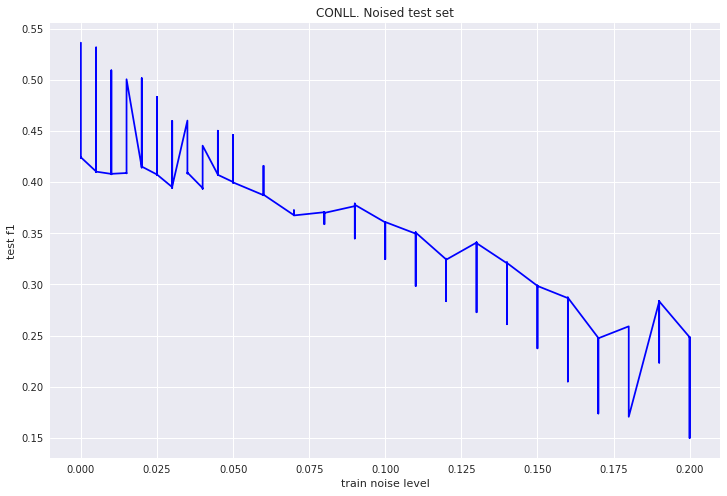

In [2]:
plt.figure(figsize=(12, 8))
plt.title('CONLL. Noised test set')
plt.xlabel('train noise level')
plt.ylabel('test f1')


results = pd.read_csv('results/CAp_fasttext_nochar.csv', index_col=0)
results.sort_values('noise_level', inplace=True)
plt.plot(results['noise_level'], results['noised_f1'] / 100., 'b', label='EmbedMatrix+CNN, CNN')

In [3]:
results.sample()

,batch_size,cell_type,char_embeddings_dim,char_embeddings_type,clean_f1,clean_n_predicted_entities,clean_n_true_entities,clean_precision,clean_recall,dropout_rate,...,noised_n_predicted_entities,noised_n_true_entities,noised_precision,noised_recall,token_embeddings_dim,trainable_embeddings,use_batch_norm,use_capitalization,use_char_embeddins,use_crf
74,8,NaN,25,cnn,40.935046,1835,3769,62.506812,30.432475,0.5,...,1836,3769,62.418301,30.405943,300,True,True,False,False,True


In [47]:
CAP_FILES = [
    'results/CAp_noembed.csv',
    'results/CAp_noembed_nochar.csv',
    'results/CAp_fasttext.csv',
    'results/CAp_fasttext_nochar.csv',
    'results/CAp_noembed_not_trainable.csv',
    'results/CAp_noembed_not_trainable_nochar.csv',
]
MODEL_NAMES = [
    'EmbedMatrix+CNN',
    'EmbedMatrix-nochar',
    'FastText+CNN',
    'FastText-nochar',
    'RandomEmbed+CNN',
    'RandomEMbed-nochar'
]

In [36]:
for f in CAP_FILES:
    results = pd.read_csv(f)
    results.sort_values('noise_level', inplace=True)
    noise_levels = results.noise_level.unique()
    stds = np.std(results['noised_f1'].values.reshape(-1, 10) / 100., axis=1)
    print(' & '.join([f.split('/')[1].strip('.csv')] + list(np.round(stds, 3).astype(str))), '\\\\')


CAp_noembed & 0.059 & 0.054 & 0.05 & 0.051 & 0.051 & 0.055 & 0.047 & 0.04 & 0.042 & 0.046 & 0.038 & 0.032 & 0.04 & 0.041 & 0.038 & 0.037 & 0.034 & 0.031 & 0.028 & 0.023 & 0.03 & 0.032 & 0.025 & 0.03 & 0.027 & 0.026 \\
CAp_noembed_nochar & 0.059 & 0.058 & 0.048 & 0.045 & 0.045 & 0.043 & 0.037 & 0.034 & 0.037 & 0.03 & 0.027 & 0.022 & 0.016 & 0.023 & 0.013 & 0.004 & 0.004 & 0.005 & 0.008 & 0.005 & 0.013 & 0.021 & 0.015 & 0.012 & 0.029 & 0.024 \\
CAp_noembed_not_trainable & 0.068 & 0.067 & 0.063 & 0.065 & 0.064 & 0.067 & 0.062 & 0.058 & 0.054 & 0.064 & 0.06 & 0.055 & 0.061 & 0.055 & 0.057 & 0.055 & 0.054 & 0.057 & 0.047 & 0.054 & 0.054 & 0.061 & 0.046 & 0.051 & 0.054 & 0.054 \\
CAp_noembed_not_trainable_nochar & 0.055 & 0.055 & 0.054 & 0.051 & 0.048 & 0.044 & 0.037 & 0.037 & 0.043 & 0.032 & 0.032 & 0.024 & 0.017 & 0.022 & 0.026 & 0.015 & 0.015 & 0.003 & 0.009 & 0.002 & 0.007 & 0.013 & 0.004 & 0.005 & 0.006 & 0.005 \\
CAp_fasttext & 0.033 & 0.032 & 0.031 & 0.028 & 0.021 & 0.022 & 0.021 & 0.

In [48]:
cap_std_df = []
for i, f in enumerate(CAP_FILES):
    print(f)
    results = pd.read_csv(f)
    results.sort_values('noise_level', inplace=True)
    noise_levels = results.noise_level.unique()
    stds = np.std(results['noised_f1'].values.reshape(-1, 10) / 100., axis=1)
    print(stds)
    stds_dict = {nl: std for nl, std in zip(noise_levels, stds)}
    stds_dict['Model'] = MODEL_NAMES[i]
    cap_std_df.append(stds_dict)
cap_std_df = pd.DataFrame(cap_std_df)

results/CAp_noembed.csv
[0.05852652 0.0544111  0.05026597 0.05081107 0.0506849  0.05451246
 0.04693743 0.03967613 0.04236779 0.04625685 0.03797157 0.03231353
 0.03971867 0.04067098 0.03814269 0.036598   0.03385252 0.03129926
 0.02835202 0.0230923  0.03020575 0.03232941 0.02547538 0.03040239
 0.02658217 0.02606307]
results/CAp_noembed_nochar.csv
[0.05889887 0.05751378 0.04799563 0.04533083 0.04481627 0.04328939
 0.03733401 0.03400454 0.03709457 0.03030782 0.02662282 0.02226246
 0.01625346 0.02261533 0.01331719 0.00438948 0.00449353 0.00501319
 0.00807951 0.00504654 0.01316854 0.02134198 0.01492887 0.01219936
 0.02851211 0.02439588]
results/CAp_fasttext.csv
[0.03259856 0.03222685 0.03129385 0.02848023 0.02129472 0.02238414
 0.02108243 0.0195368  0.0121073  0.01558394 0.01724632 0.00971928
 0.00229767 0.00281269 0.00807513 0.00890293 0.01670798 0.01518769
 0.01945902 0.0203618  0.01734161 0.02616026 0.01935103 0.02163218
 0.01767037 0.02767595]
results/CAp_fasttext_nochar.csv
[0.0336487  

In [114]:
DATASET = 'CAp'

FILES = [
    'results/CAp_noembed.csv',
    'results/CAp_noembed_nochar.csv',
    'results/CAp_fasttext.csv',
    'results/CAp_fasttext_nochar.csv',
    'results/CAp_noembed_not_trainable.csv',
    'results/CAp_noembed_not_trainable_nochar.csv',

    'results/CAp_noembed_lstmnet.csv',
    'results/CAp_noembed_nochar_lstmnet.csv',
    'results/CAp_fasttext_lstmnet.csv',
    'results/CAp_fasttext_nochar_lstmnet.csv',
]

MODEL_NAMES = [
    'EmbedMatrix+CNN',
    'EmbedMatrix-nochar',
    'FastText+CNN',
    'FastText-nochar',
    'RandomEmbed+CNN',
    'RandomEmbed-nochar',
    
    'EmbedMatrix+CNN, LSTM',
    'EmbedMatrix-nochar, LSTM',
    'FastText+CNN, LSTM',
    'FastText-nochar, LSTM',
]

cap_std_df = []
for i, f in enumerate(FILES):
    try:
        results = pd.read_csv(f)
        results.sort_values('noise_level', inplace=True)
        noise_levels = results.noise_level.unique()
        stds = np.std(results['noised_f1'].values.reshape(-1, 10) / 100., axis=1)
        noise_levels = np.round(noise_levels, 3)
        stds = np.round(stds, 3)
        stds_dict = {nl: std for nl, std in zip(noise_levels, stds)}
        stds_dict['Model'] = MODEL_NAMES[i]
        cap_std_df.append(stds_dict)
    except:
        print(f)
cap_std_df = pd.DataFrame(cap_std_df)

transposed = cap_std_df[cap_std_df.columns[:-1]].transpose()
transposed.columns = cap_std_df['Model']
transposed.index.name = 'noise_level'
transposed.to_csv(f'results/stats_{DATASET}.csv')
print(transposed.max())
transposed

Model
EmbedMatrix+CNN             0.059
EmbedMatrix-nochar          0.059
FastText+CNN                0.033
FastText-nochar             0.036
RandomEmbed+CNN             0.068
RandomEmbed-nochar          0.055
EmbedMatrix+CNN, LSTM       0.060
EmbedMatrix-nochar, LSTM    0.066
FastText+CNN, LSTM          0.038
FastText-nochar, LSTM       0.040
dtype: float64


Model,EmbedMatrix+CNN,EmbedMatrix-nochar,FastText+CNN,FastText-nochar,RandomEmbed+CNN,RandomEmbed-nochar,"EmbedMatrix+CNN, LSTM","EmbedMatrix-nochar, LSTM","FastText+CNN, LSTM","FastText-nochar, LSTM"
noise_level,,,,,,,,,,
0.000,0.059,0.059,0.033,0.034,0.068,0.055,0.060,0.066,0.035,0.038
0.005,0.054,0.058,0.032,0.036,0.067,0.055,0.055,0.057,0.038,0.040
0.010,0.050,0.048,0.031,0.030,0.063,0.054,0.056,0.050,0.032,0.033
0.015,0.051,0.045,0.028,0.027,0.065,0.051,0.047,0.049,0.030,0.028
0.020,0.051,0.045,0.021,0.026,0.064,0.048,0.055,0.041,0.032,0.031
0.025,0.055,0.043,0.022,0.023,0.067,0.044,0.050,0.044,0.027,0.028
0.030,0.047,0.037,0.021,0.019,0.062,0.037,0.044,0.038,0.026,0.023
0.035,0.040,0.034,0.020,0.015,0.058,0.037,0.041,0.034,0.024,0.021
0.040,0.042,0.037,0.012,0.013,0.054,0.043,0.038,0.034,0.015,0.019


In [115]:
DATASET = 'Persons1000'

FILES = [
    'results/collection5_noembed.csv',
    'results/collection5_noembed_nochar.csv',
    'results/collection5_fasttext.csv',
    'results/collection5_fasttext_nochar.csv',
    'results/collection5_noembed_not_trainable.csv',
    'results/collection5_noembed_not_trainable_nochar.csv',
    'results/collection5_word2vec_fixed.csv',
    'results/collection5_word2vec_fixed_nochar.csv',

    'results/collection5_noembed_lstmnet.csv',
    'results/collection5_noembed_nochar_lstmnet.csv',
    'results/collection5_fasttext_lstmnet.csv',
    'results/collection5_fasttext_nochar_lstmnet.csv',
]
MODEL_NAMES = [
    'EmbedMatrix+CNN',
    'EmbedMatrix-nochar',
    'FastText+CNN',
    'FastText-nochar',
    'RandomEmbed+CNN',
    'RandomEmbed-nochar',
    'Word2Vec+CNN',
    'Word2Vec-nochar',

    'EmbedMatrix+CNN, LSTM',
    'EmbedMatrix-nochar, LSTM',
    'FastText+CNN, LSTM',
    'FastText-nochar, LSTM',
]

cap_std_df = []
for i, f in enumerate(FILES):
    try:
        results = pd.read_csv(f)
        results.sort_values('noise_level', inplace=True)
        noise_levels = results.noise_level.unique()
        stds = np.std(results['noised_f1'].values.reshape(-1, 10) / 100., axis=1)
        noise_levels = np.round(noise_levels, 3)
        stds = np.round(stds, 3)
        stds_dict = {nl: std for nl, std in zip(noise_levels, stds)}
        stds_dict['Model'] = MODEL_NAMES[i]
        cap_std_df.append(stds_dict)
    except:
        print(f)
cap_std_df = pd.DataFrame(cap_std_df)

transposed = cap_std_df[cap_std_df.columns[:-1]].transpose()
transposed.columns = cap_std_df['Model']
transposed.index.name = 'noise_level'
transposed.to_csv(f'results/stats_{DATASET}.csv')
print(transposed.max())
transposed

Model
EmbedMatrix+CNN             0.056
EmbedMatrix-nochar          0.097
FastText+CNN                0.049
FastText-nochar             0.049
RandomEmbed+CNN             0.036
RandomEmbed-nochar          0.049
Word2Vec+CNN                0.105
Word2Vec-nochar             0.102
EmbedMatrix+CNN, LSTM       0.051
EmbedMatrix-nochar, LSTM    0.095
FastText+CNN, LSTM          0.045
FastText-nochar, LSTM       0.044
dtype: float64


Model,EmbedMatrix+CNN,EmbedMatrix-nochar,FastText+CNN,FastText-nochar,RandomEmbed+CNN,RandomEmbed-nochar,Word2Vec+CNN,Word2Vec-nochar,"EmbedMatrix+CNN, LSTM","EmbedMatrix-nochar, LSTM","FastText+CNN, LSTM","FastText-nochar, LSTM"
noise_level,,,,,,,,,,,,
0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.005,0.003,0.003,0.002,0.002,0.002,0.003,0.003,0.003,0.003,0.004,0.002,0.001
0.010,0.006,0.006,0.004,0.005,0.004,0.004,0.008,0.008,0.006,0.008,0.005,0.007
0.015,0.008,0.007,0.006,0.008,0.005,0.006,0.015,0.013,0.009,0.008,0.007,0.008
0.020,0.009,0.013,0.008,0.008,0.004,0.011,0.016,0.016,0.010,0.011,0.007,0.008
0.025,0.013,0.014,0.011,0.009,0.007,0.012,0.019,0.020,0.011,0.015,0.010,NaN
0.030,0.015,0.016,0.011,0.013,0.009,0.016,0.026,0.025,0.012,0.017,0.011,NaN
0.035,0.014,0.020,0.015,0.015,0.008,0.014,0.027,0.027,0.014,0.021,0.013,NaN
0.040,0.017,0.027,0.014,0.014,0.011,0.017,0.028,0.029,0.017,0.025,0.015,NaN


In [116]:
DATASET = 'CONLL'

FILES = [
    'results/conll2003_noembed.csv',
    'results/conll2003_noembed_nochar.csv',
    'results/conll2003_fasttext.csv', # !
    'results/conll2003_fasttext_nochar.csv', # !
    'results/conll2003_noembed_not_trainable.csv',
    'results/conll2003_noembed_not_trainable_nochar.csv', # !
    'results/conll2003_word2vec_fixed.csv', # !
    'results/conll2003_word2vec_fixed_nochar.csv', # !
    'results/conll2003_noembed_lstmnet.csv',
    'results/conll2003_noembed_nochar_lstmnet.csv',
    'results/conll2003_fasttext_lstmnet.csv', # !
    'results/conll2003_fasttext_nochar_lstmnet.csv', # !
]
MODEL_NAMES = [
    'EmbedMatrix+CNN',
    'EmbedMatrix-nochar',
    'FastText+CNN',
    'FastText-nochar',
    'RandomEmbed+CNN',
    'RandomEmbed-nochar',
    'Word2Vec+CNN',
    'Word2Vec-nochar',
    
    'EmbedMatrix+CNN, LSTM',
    'EmbedMatrix-nochar, LSTM',
    'FastText+CNN, LSTM',
    'FastText-nochar, LSTM'
]

cap_std_df = []
for i, f in enumerate(FILES):
    try:
        results = pd.read_csv(f)
        results.sort_values('noise_level', inplace=True)
        noise_levels = results.noise_level.unique()
        stds = np.std(results['noised_f1'].values.reshape(-1, 10) / 100., axis=1)
        noise_levels = np.round(noise_levels, 3)
        stds = np.round(stds, 3)
        stds_dict = {nl: std for nl, std in zip(noise_levels, stds)}
        stds_dict['Model'] = MODEL_NAMES[i]
        cap_std_df.append(stds_dict)
    except Exception as e:
        print(e)
cap_std_df = pd.DataFrame(cap_std_df)

transposed = cap_std_df[cap_std_df.columns[:-1]].transpose()
transposed.columns = cap_std_df['Model']
transposed.index.name = 'noise_level'
transposed.to_csv(f'results/stats_{DATASET}.csv')
print(transposed.max())
transposed

Model
EmbedMatrix+CNN             0.046
EmbedMatrix-nochar          0.058
FastText+CNN                0.042
FastText-nochar             0.044
RandomEmbed+CNN             0.021
RandomEmbed-nochar          0.027
Word2Vec+CNN                0.062
Word2Vec-nochar             0.060
EmbedMatrix+CNN, LSTM       0.043
EmbedMatrix-nochar, LSTM    0.060
FastText+CNN, LSTM          0.039
FastText-nochar, LSTM       0.040
dtype: float64


Model,EmbedMatrix+CNN,EmbedMatrix-nochar,FastText+CNN,FastText-nochar,RandomEmbed+CNN,RandomEmbed-nochar,Word2Vec+CNN,Word2Vec-nochar,"EmbedMatrix+CNN, LSTM","EmbedMatrix-nochar, LSTM","FastText+CNN, LSTM","FastText-nochar, LSTM"
noise_level,,,,,,,,,,,,
0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.005,0.003,0.003,0.003,0.002,0.002,0.002,0.004,0.005,0.003,0.003,0.003,0.003
0.010,0.005,0.005,0.005,0.005,0.002,0.003,0.007,0.005,0.005,0.004,0.005,0.005
0.015,0.006,0.006,0.007,0.006,0.003,0.004,0.010,0.010,0.006,0.006,0.005,0.005
0.020,0.008,0.010,0.008,0.009,0.005,0.005,0.013,0.012,0.007,0.009,0.008,0.007
0.025,0.010,0.010,0.011,0.010,0.004,0.007,0.014,0.016,0.010,0.012,0.008,0.008
0.030,0.011,0.013,0.010,0.011,0.006,0.008,0.014,0.015,0.011,0.014,0.008,0.008
0.035,0.012,0.016,0.013,0.011,0.004,0.009,0.017,0.018,0.013,0.015,0.012,0.011
0.040,0.014,0.017,0.014,0.015,0.006,0.010,0.019,0.022,0.015,0.018,0.011,0.011


In [94]:
print(transposed.max())

Model
EmbedMatrix+CNN       0.045987
EmbedMatrix-nochar    0.058378
RandomEmbed+CNN       0.021384
RandomEmbed-nochar    0.026641
dtype: float64
